In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("white")
import glob
import json
import os
import sys
import shutil


In [2]:
modeldir = "upscalers_splits"

In [3]:

def read_results(x):
    r = []
    with open(x) as xp:
        j = json.load(xp)
    for i, v in enumerate(j["val_accuracy"]):
        rr = {
            "model": j["model"],
            "val_accuracy": v,
            "epoch": i
        }
        r.append(rr)
    return r
    

df = pd.DataFrame(sum(list(map(read_results, glob.glob(f"results/{modeldir}/*.json"))), []))

d(df)

,model,val_accuracy,epoch
0,DenseNet201,0.605927,0
1,DenseNet201,0.641930,1
2,DenseNet201,0.661768,2
3,DenseNet201,0.672055,3
4,DenseNet201,0.685525,4
...,...,...,...
2545,VGG16,0.504286,145
2546,VGG16,0.511634,146
2547,VGG16,0.520696,147
2548,VGG16,0.516777,148


/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='epoch', ylabel='val_accuracy'>

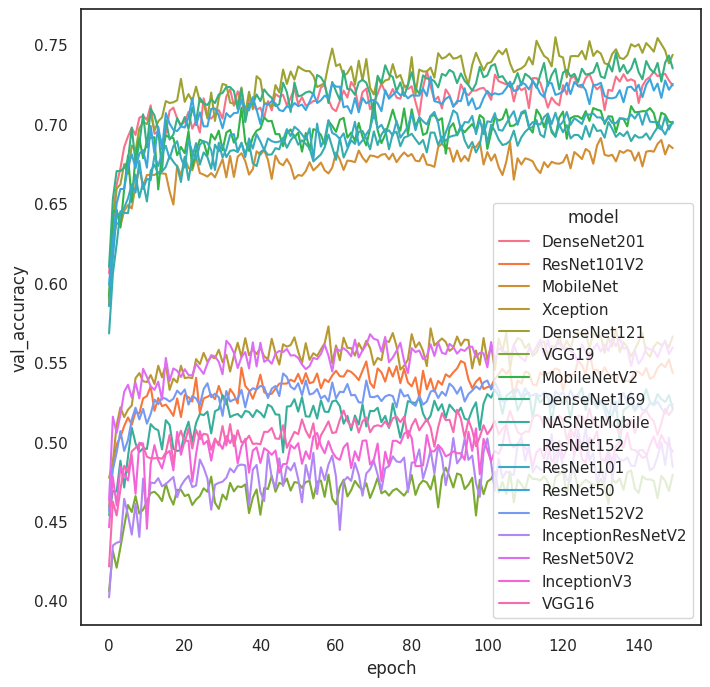

In [4]:
sns.lineplot(x="epoch", y="val_accuracy", hue="model", data=df)

/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sgoering/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='val_accuracy', ylabel='model'>

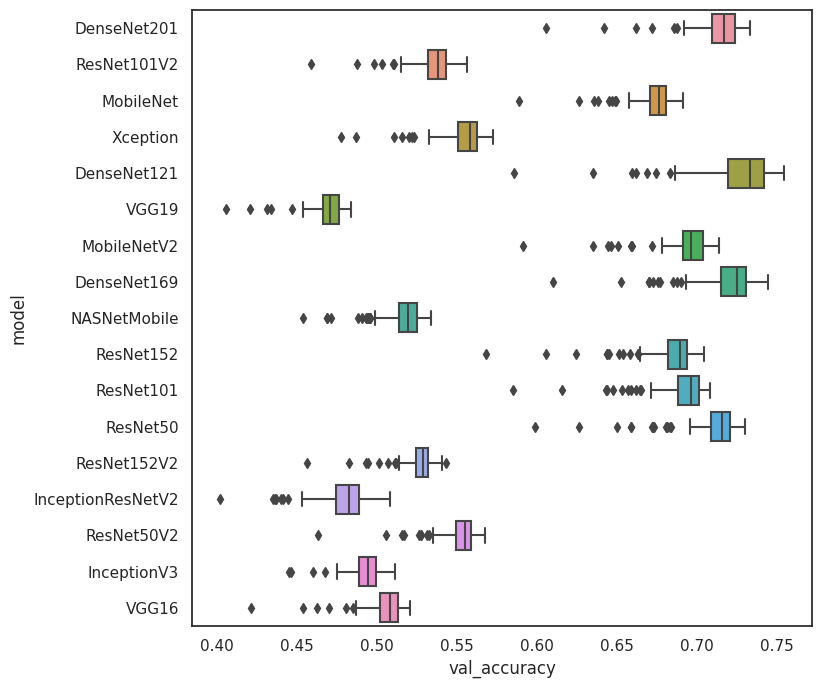

In [5]:
sns.boxplot(y="model", x="val_accuracy", data=df)

In [6]:
sorted_df = df[["model", "val_accuracy"]].groupby(by="model").max().reset_index().sort_values(by="val_accuracy")
d(sorted_df)

,model,val_accuracy
15,VGG19,0.483713
3,InceptionResNetV2,0.508450
4,InceptionV3,0.511389
14,VGG16,0.520940
7,NASNetMobile,0.533921
11,ResNet152V2,0.542983
9,ResNet101V2,0.556209
13,ResNet50V2,0.567720
16,Xception,0.572618
5,MobileNet,0.691158


In [7]:
best_model = sorted_df["model"].values[-1]
print(best_model)

DenseNet121


In [9]:
!mkdir -p results/upscalers_splits/figures/


2
2
[2 0 2 ... 5 5 5] 4083 4083
                 precision    recall  f1-score   support

         BSRGAN       0.75      0.60      0.67       741
          KXNet       0.68      0.76      0.72       727
    Real-ESRGAN       0.66      0.78      0.71       741
        lanczos       0.85      0.81      0.83       805
src_images_1080       0.61      0.65      0.63       337
        waifu2x       0.87      0.79      0.83       732

       accuracy                           0.74      4083
      macro avg       0.74      0.73      0.73      4083
   weighted avg       0.75      0.74      0.74      4083

{
    "model": "DenseNet121",
    "accuracy": 0.7418564780798432,
    "f1": 0.7427171239280569,
    "precision": 0.7503072264268423,
    "recall": 0.7418564780798432,
    "mcc": 0.688607675630363
}


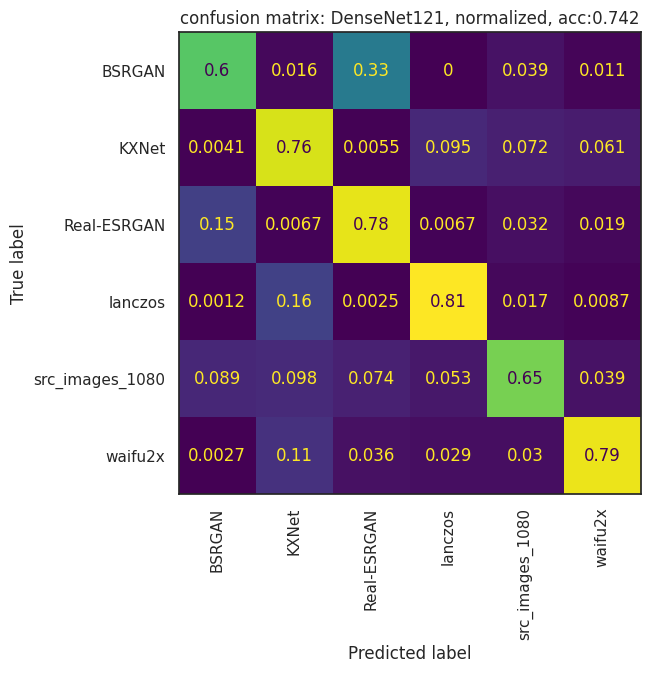

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import matthews_corrcoef, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report


def get_class(x):
    return np.argmax(x)


sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

def eval_model(resfile, resultdir="results/rules_2_small"):
    with open(resfile) as xfp:
        one_dnn = json.load(xfp)
    #print(one_dnn.keys())
    #print(one_dnn["classnames"])
    #print(one_dnn["pred"])
    #print(one_dnn["truth"])
    
    model = os.path.splitext(os.path.basename(resfile))[0]
    numclasses = len(one_dnn["classnames"])
    one_dnn["pred_d"] = np.array(one_dnn["pred"]).reshape((len(one_dnn["pred"]) // numclasses, numclasses))

    print(get_class(one_dnn["pred_d"][0]))
    print(get_class([1,2,3]))

    xy = np.apply_along_axis(get_class, 1, one_dnn["pred_d"])
    print(xy, len(xy), len(one_dnn["pred"]) // numclasses)
    one_dnn["pred_c"] = xy
    
    

    cmd = ConfusionMatrixDisplay.from_predictions(
        one_dnn["truth"], 
        one_dnn["pred_c"],
        display_labels=one_dnn["classnames"],
        normalize="true",
        xticks_rotation="vertical",
        colorbar=False
    )
    ax = cmd.ax_
    val_acc = accuracy_score(one_dnn["truth"], one_dnn["pred_c"])
    ax.set_title(f"confusion matrix: {model}, normalized, acc:{round(val_acc, 3)}")
    ax.get_figure().savefig(f"{resultdir}/figures/confusion_matrix_{model}.pdf", bbox_inches="tight")
   
    class_rep = classification_report(one_dnn["truth"], one_dnn["pred_c"], target_names=one_dnn["classnames"])
    print(class_rep)
    return {
        "model": model,
        "accuracy": accuracy_score(one_dnn["truth"], one_dnn["pred_c"]),
        "f1": f1_score(one_dnn["truth"], one_dnn["pred_c"], average='weighted'),
        "precision": precision_score(one_dnn["truth"], one_dnn["pred_c"], average='weighted'),
        "recall": recall_score(one_dnn["truth"], one_dnn["pred_c"], average='weighted'),
        "mcc": matthews_corrcoef(one_dnn["truth"], one_dnn["pred_c"]),
        
    }

#eval_model(resfile="results/rules/ResNet50V2.json", resultdir="results/rules")
print(json.dumps(
        eval_model(
            resfile=f"results/{modeldir}/{best_model}.json", 
            resultdir=f"results/{modeldir}"
        )
    , indent=4)
)


results/upscalers_splits/DenseNet201.json
0
2
[0 0 0 ... 5 5 5] 4083 4083
                 precision    recall  f1-score   support

         BSRGAN       0.66      0.75      0.70       741
          KXNet       0.72      0.69      0.70       727
    Real-ESRGAN       0.72      0.64      0.68       741
        lanczos       0.75      0.81      0.78       805
src_images_1080       0.71      0.58      0.63       337
        waifu2x       0.78      0.80      0.79       732

       accuracy                           0.72      4083
      macro avg       0.72      0.71      0.71      4083
   weighted avg       0.72      0.72      0.72      4083

results/upscalers_splits/ResNet101V2.json
0
2
[0 0 2 ... 5 5 5] 4083 4083
                 precision    recall  f1-score   support

         BSRGAN       0.46      0.48      0.47       741
          KXNet       0.54      0.49      0.51       727
    Real-ESRGAN       0.46      0.47      0.46       741
        lanczos       0.65      0.69      0.67    

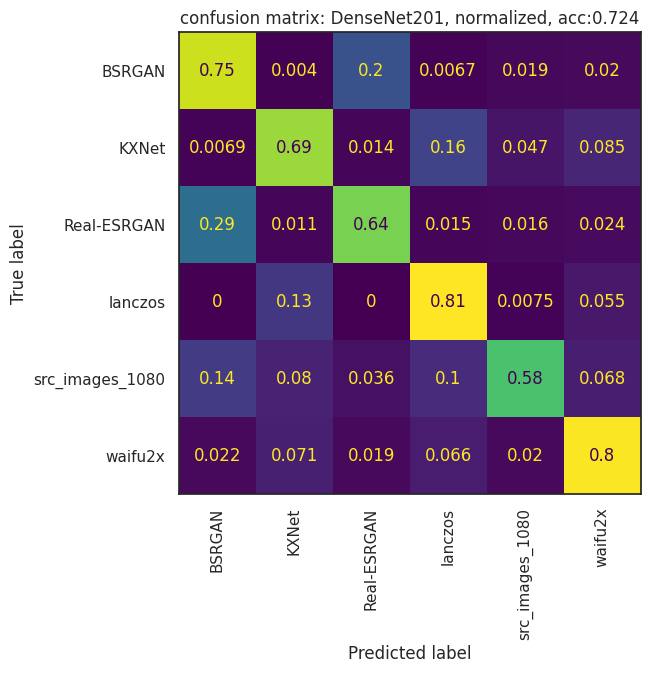

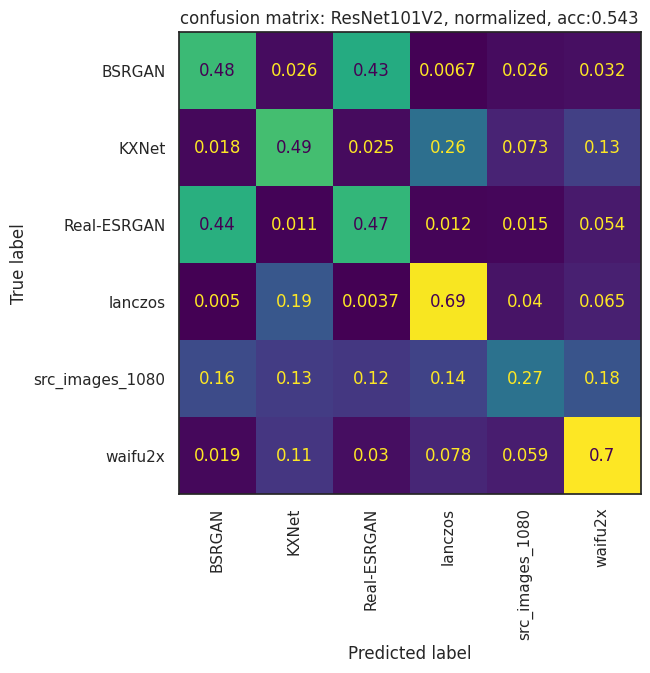

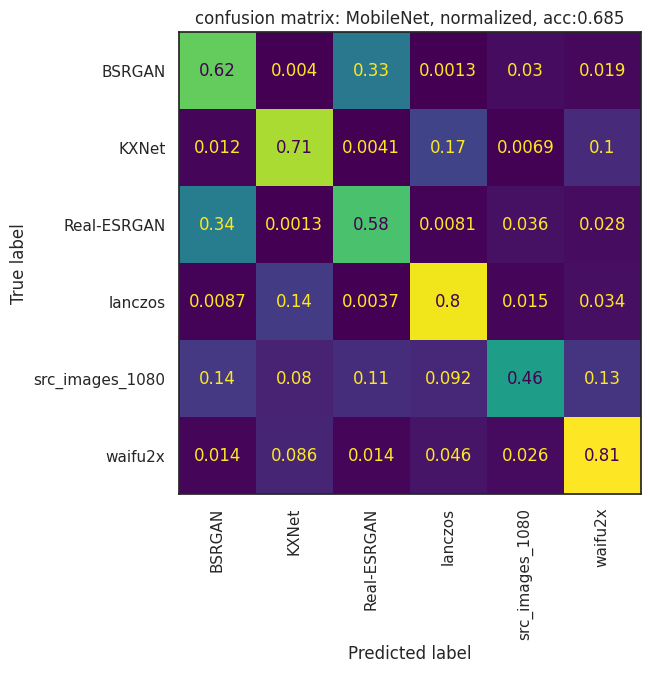

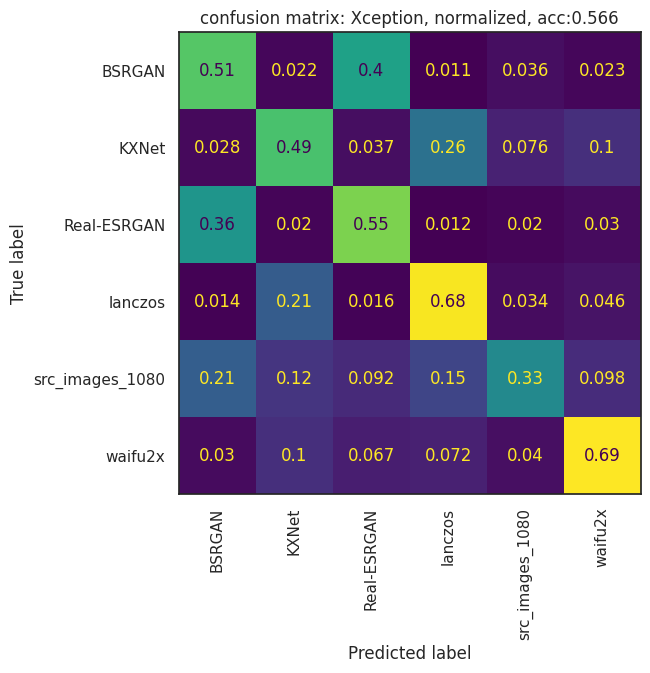

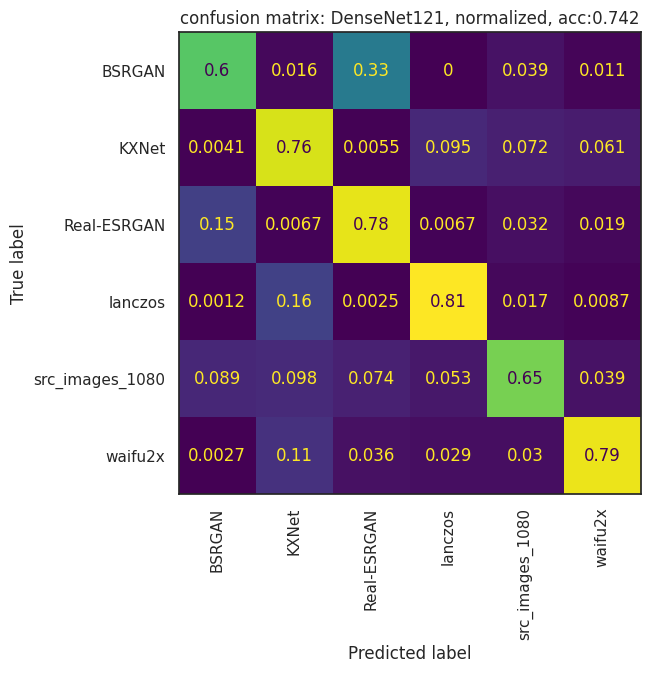

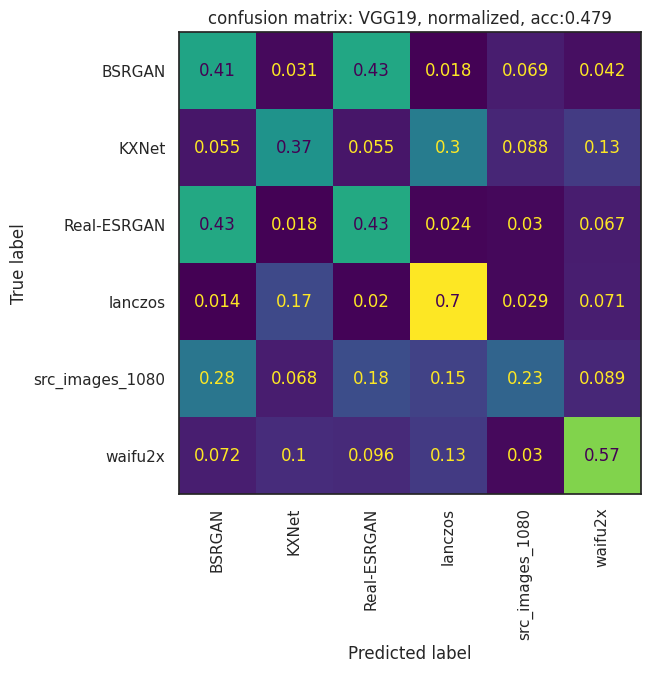

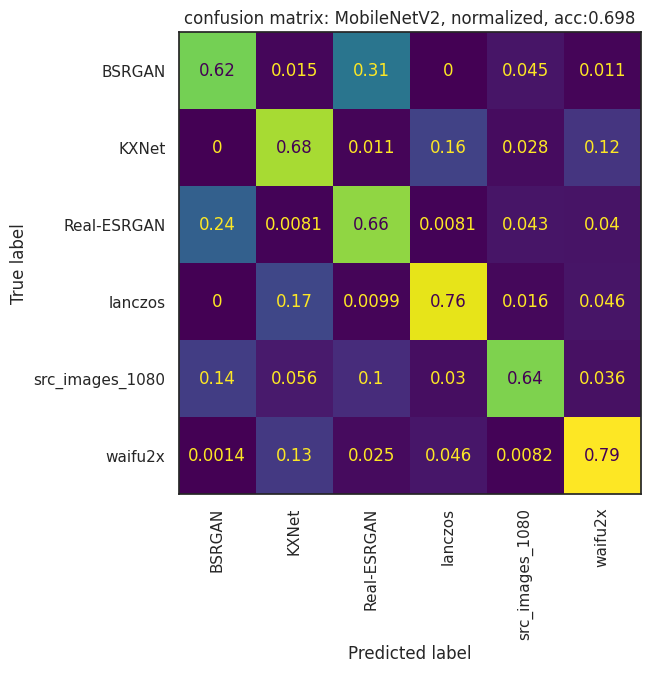

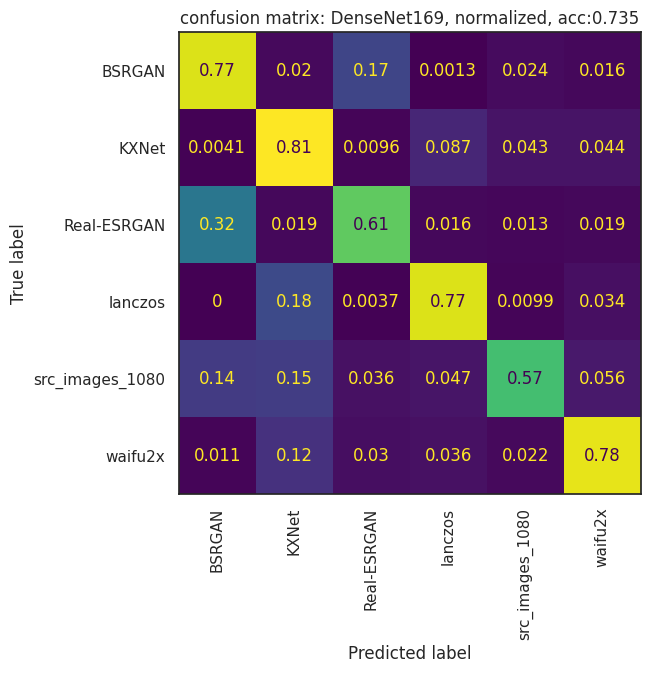

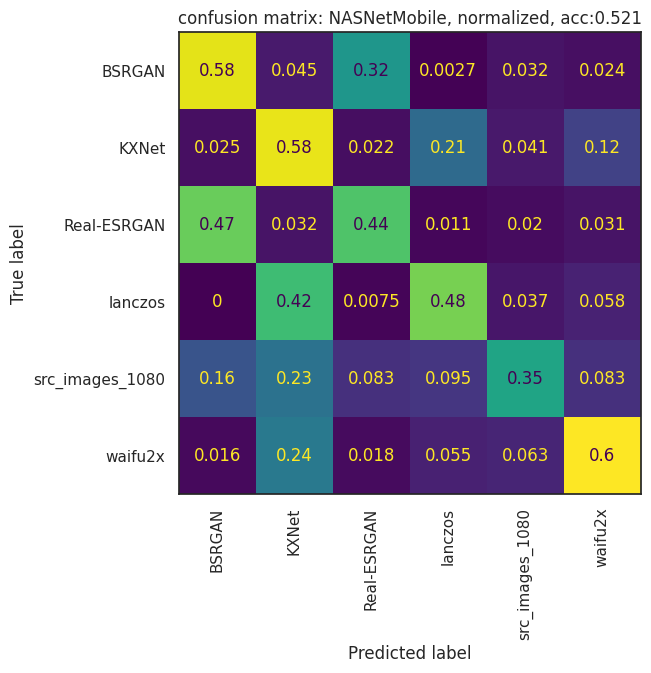

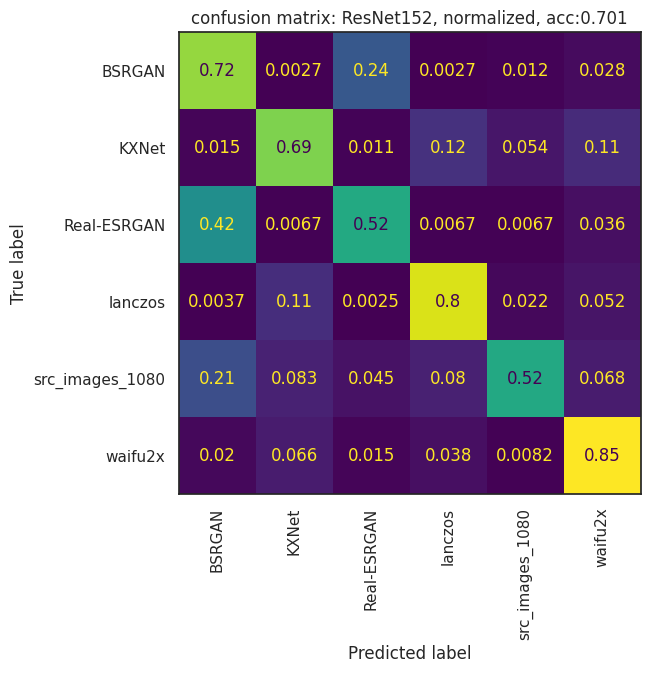

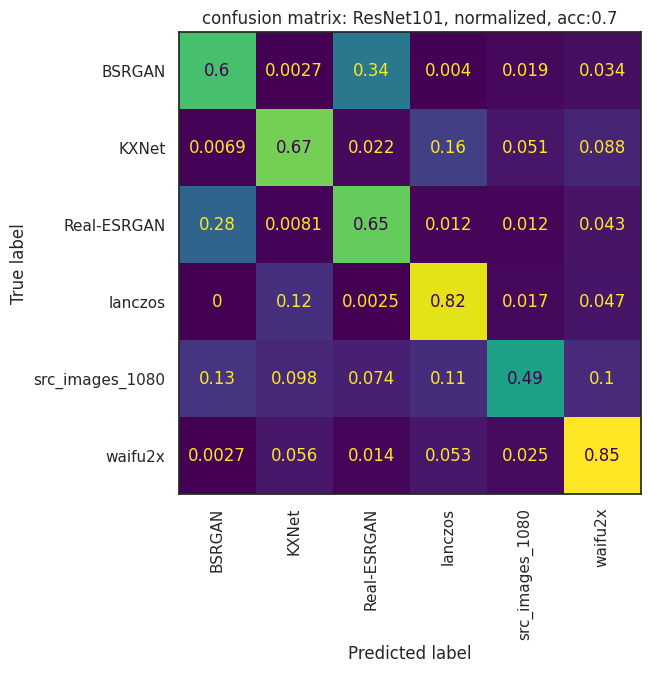

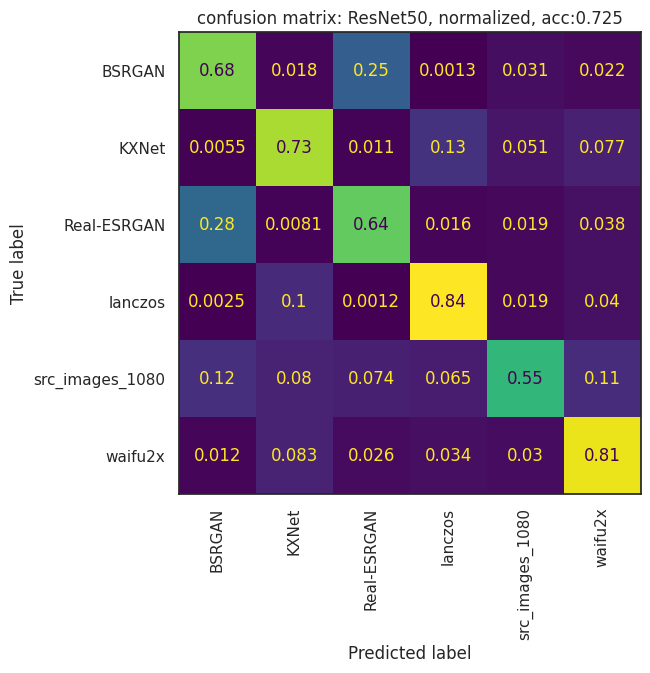

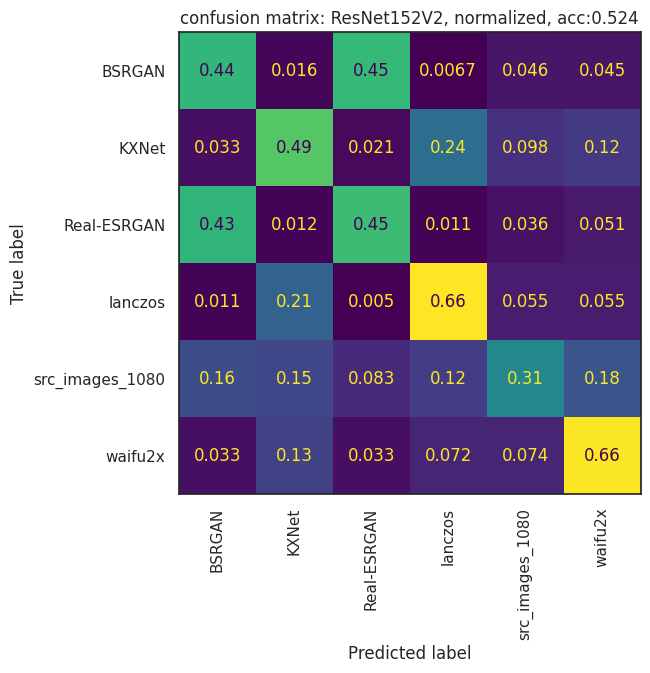

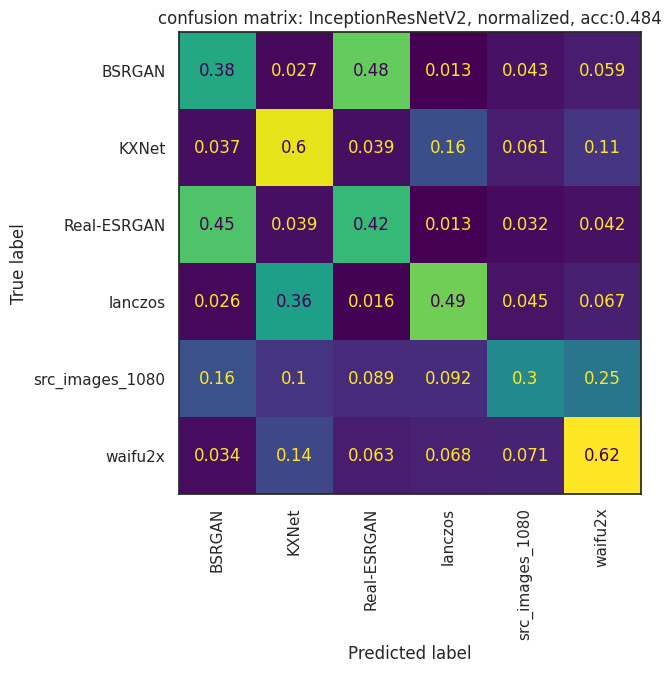

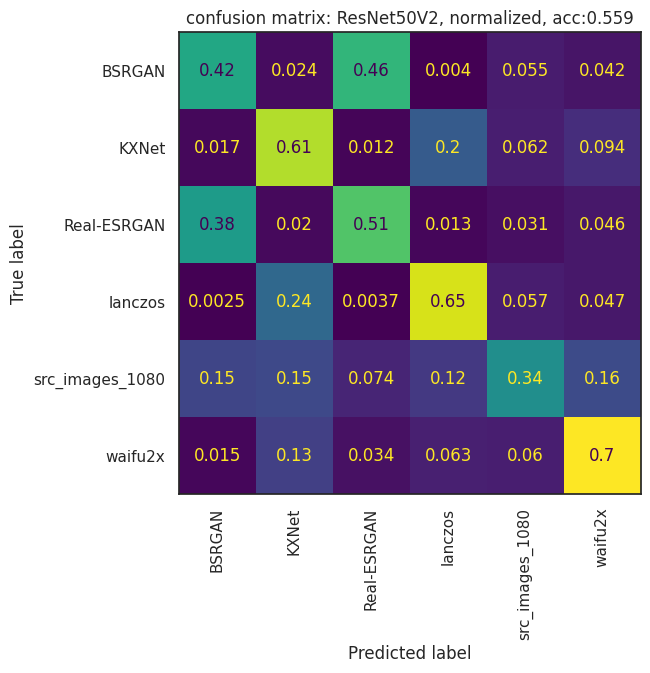

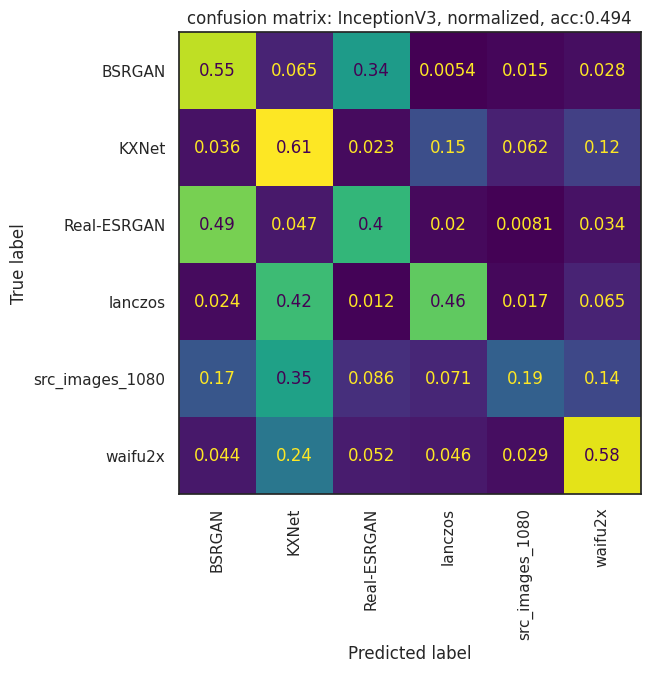

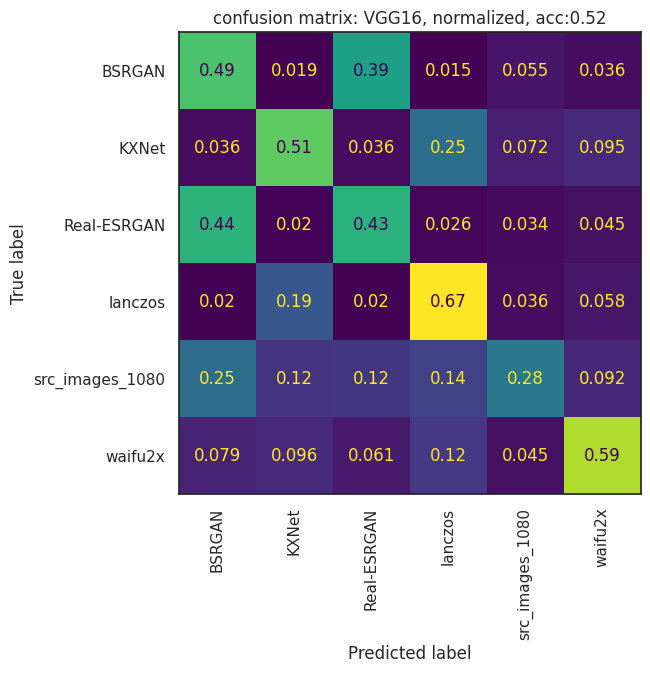

In [9]:
metrics = []
for x in glob.glob(f"results/{modeldir}/*.json"):
    print(x)
    metrics.append(
        eval_model(
            resfile=x, 
            resultdir=f"results/{modeldir}"
        )
    )

In [10]:
dm = pd.DataFrame(metrics).sort_values(by="accuracy", ascending=False)

d(dm)
print(dm.round(3).to_latex(index=False))

,model,accuracy,f1,precision,recall,mcc
4,DenseNet121,0.741856,0.742717,0.750307,0.741856,0.688608
7,DenseNet169,0.734999,0.734897,0.743327,0.734999,0.679975
11,ResNet50,0.724957,0.723690,0.723145,0.724957,0.666153
0,DenseNet201,0.724467,0.722996,0.724847,0.724467,0.665727
9,ResNet152,0.701445,0.698900,0.705576,0.701445,0.638899
10,ResNet101,0.699976,0.696818,0.697491,0.699976,0.635756
6,MobileNetV2,0.697771,0.697867,0.698843,0.697771,0.633521
2,MobileNet,0.685280,0.682856,0.683608,0.685280,0.617524
3,Xception,0.566005,0.564728,0.565853,0.566005,0.472753
14,ResNet50V2,0.558658,0.557524,0.557859,0.558658,0.464858


\begin{tabular}{lrrrrr}
\toprule
model & accuracy & f1 & precision & recall & mcc \\
\midrule
DenseNet121 & 0.742000 & 0.743000 & 0.750000 & 0.742000 & 0.689000 \\
DenseNet169 & 0.735000 & 0.735000 & 0.743000 & 0.735000 & 0.680000 \\
ResNet50 & 0.725000 & 0.724000 & 0.723000 & 0.725000 & 0.666000 \\
DenseNet201 & 0.724000 & 0.723000 & 0.725000 & 0.724000 & 0.666000 \\
ResNet152 & 0.701000 & 0.699000 & 0.706000 & 0.701000 & 0.639000 \\
ResNet101 & 0.700000 & 0.697000 & 0.697000 & 0.700000 & 0.636000 \\
MobileNetV2 & 0.698000 & 0.698000 & 0.699000 & 0.698000 & 0.634000 \\
MobileNet & 0.685000 & 0.683000 & 0.684000 & 0.685000 & 0.618000 \\
Xception & 0.566000 & 0.565000 & 0.566000 & 0.566000 & 0.473000 \\
ResNet50V2 & 0.559000 & 0.558000 & 0.558000 & 0.559000 & 0.465000 \\
ResNet101V2 & 0.543000 & 0.539000 & 0.537000 & 0.543000 & 0.445000 \\
ResNet152V2 & 0.524000 & 0.523000 & 0.523000 & 0.524000 & 0.422000 \\
NASNetMobile & 0.521000 & 0.523000 & 0.539000 & 0.521000 & 0.421000 \\
VGG16 & 

['data/upscalers_splits/Real-ESRGAN/x2/IMG_20180224_212247556_21.png', 'data/upscalers_splits/Real-ESRGAN/x2/IMG_6819_1.png', 'data/upscalers_splits/Real-ESRGAN/x2/IMG_4480_5.png', 'data/upscalers_splits/Real-ESRGAN/x2/MG_9163_7.png', 'data/upscalers_splits/Real-ESRGAN/x2/IMG_7817_6.png', 'data/upscalers_splits/Real-ESRGAN/x2/IMG_6970_13.png', 'data/upscalers_splits/Real-ESRGAN/x2/IMG_5571_6.png', 'data/upscalers_splits/Real-ESRGAN/x2/IMG_6426_16.png', 'data/upscalers_splits/Real-ESRGAN/x2/IMG_5391_23.png', 'data/upscalers_splits/Real-ESRGAN/x2/IMG_8886_20.png']


,image,factor,model,img_split_name
0,data/upscalers_splits/Real-ESRGAN/x2/IMG_20180...,x2,Real-ESRGAN,IMG_20180224_212247556_21.png
1,data/upscalers_splits/Real-ESRGAN/x2/IMG_6819_...,x2,Real-ESRGAN,IMG_6819_1.png
2,data/upscalers_splits/Real-ESRGAN/x2/IMG_4480_...,x2,Real-ESRGAN,IMG_4480_5.png
3,data/upscalers_splits/Real-ESRGAN/x2/MG_9163_7...,x2,Real-ESRGAN,MG_9163_7.png
4,data/upscalers_splits/Real-ESRGAN/x2/IMG_7817_...,x2,Real-ESRGAN,IMG_7817_6.png
...,...,...,...,...
40827,data/upscalers_splits/BSRGAN/x4/IMG_5656_BSRGA...,x4,BSRGAN,IMG_5656_BSRGAN_21.png
40828,data/upscalers_splits/BSRGAN/x4/IMG_20190901_1...,x4,BSRGAN,IMG_20190901_161832305_BSRGAN_22.png
40829,data/upscalers_splits/BSRGAN/x4/IMG_5984_BSRGA...,x4,BSRGAN,IMG_5984_BSRGAN_15.png
40830,data/upscalers_splits/BSRGAN/x4/blume_BSRGAN_1...,x4,BSRGAN,blume_BSRGAN_19.png


,model,factor,image,img_split_name
0,BSRGAN,x2,3712,3712
1,BSRGAN,x4,3712,3712
2,KXNet,x2,3712,3712
3,KXNet,x4,3712,3712
4,Real-ESRGAN,x2,3712,3712
5,Real-ESRGAN,x4,3712,3712
6,lanczos,x2,3712,3712
7,lanczos,x4,3712,3712
8,src_images_1080,x1,3712,3712
9,waifu2x,x2,3712,3712


<Axes: xlabel='count', ylabel='model'>

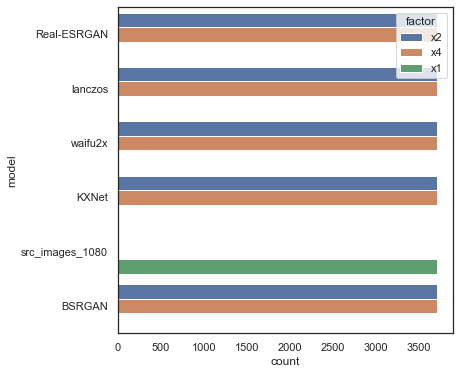

In [13]:
# check dataset for training and validation (count number of images per "rule")
images = []
for rule in list(glob.glob(f"data/{modeldir}/*/*/")):
    images.extend(list(glob.glob(rule + "*.png")))
    
print(images[0:10])
dimg = pd.DataFrame({"image": images})
dimg["factor"] = dimg["image"].apply(lambda x: os.path.basename(os.path.dirname(x)))
dimg["model"] = dimg["image"].apply(lambda x: os.path.basename(os.path.dirname(os.path.dirname(x))))
dimg["img_split_name"] = dimg["image"].apply(lambda x: os.path.basename(x))

d(dimg)

d(dimg.groupby(by=["model", "factor"]).count().reset_index().sort_values(by="img_split_name"))
sns.countplot(data=dimg, y="model", hue="factor")

In [14]:
# check for missing images
missing = set(dimg[dimg["model"] == "src_images_1080"]["img_split_name"].values) - set(dimg[dimg["model"] == "Real-ESRGAN"][dimg["factor"] == "x4"]["img_split_name"].values)
print(f"missing: {len(missing)}")
print(missing)


missing: 0
set()


/tmp/ipykernel_2854903/2440005406.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing = set(dimg[dimg["model"] == "src_images_1080"]["img_split_name"].values) - set(dimg[dimg["model"] == "Real-ESRGAN"][dimg["factor"] == "x4"]["img_split_name"].values)


In [16]:
resfile = f"results/{modeldir}/{best_model}.json"
with open(resfile) as xfp:
    one_dnn = json.load(xfp)

model = os.path.splitext(os.path.basename(resfile))[0]
numclasses = len(one_dnn["classnames"])
one_dnn["pred_d"] = np.array(one_dnn["pred"]).reshape((len(one_dnn["pred"]) // numclasses, numclasses))
xy = np.apply_along_axis(get_class, 1, one_dnn["pred_d"])
one_dnn["pred_c"] = xy

print(one_dnn["classnames"])
print(one_dnn.keys())
dd = pd.DataFrame({
    "pred_c": one_dnn["pred_c"], 
    "truth": one_dnn["truth"], 
    "validation_files": one_dnn["validation_files"]
})

d(dd)



#from IPython.display import Image
#Image(example)


['BSRGAN', 'KXNet', 'Real-ESRGAN', 'lanczos', 'src_images_1080', 'waifu2x']
dict_keys(['accuracy', 'classnames', 'loss', 'model', 'pred', 'truth', 'val_accuracy', 'val_loss', 'validation_files', 'pred_d', 'pred_c'])


,pred_c,truth,validation_files
0,2,0,data/upscalers_splits/BSRGAN/x2/01_IMG_9678_BS...
1,0,0,data/upscalers_splits/BSRGAN/x2/01_IMG_9832_BS...
2,2,0,data/upscalers_splits/BSRGAN/x2/01_IMG_9943_BS...
3,2,0,data/upscalers_splits/BSRGAN/x2/01_IMG_9943_BS...
4,0,0,data/upscalers_splits/BSRGAN/x2/01_IMG_9943_BS...
...,...,...,...
4078,5,5,data/upscalers_splits/waifu2x/x4/OUT_8905_15.png
4079,5,5,data/upscalers_splits/waifu2x/x4/OUT_8905_20.png
4080,5,5,data/upscalers_splits/waifu2x/x4/blume_15.png
4081,5,5,data/upscalers_splits/waifu2x/x4/blume_2.png
